In [1]:
import os
import sys
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv(r'F:\machine learning and deep learning\datasets\mlcourse\winequality-white.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null category
dtypes: category(1), float64(11)
memory usage: 426.2 KB


In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


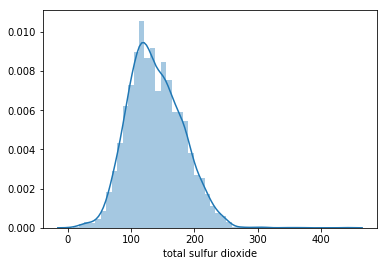

In [67]:
sns.distplot(data['total sulfur dioxide']);

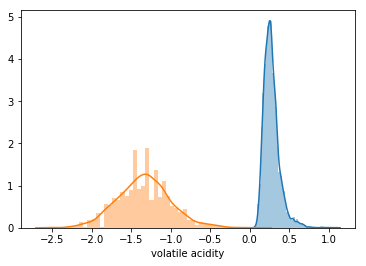

In [74]:
sns.distplot(data['volatile acidity'])
sns.distplot(np.log(data['volatile acidity']))

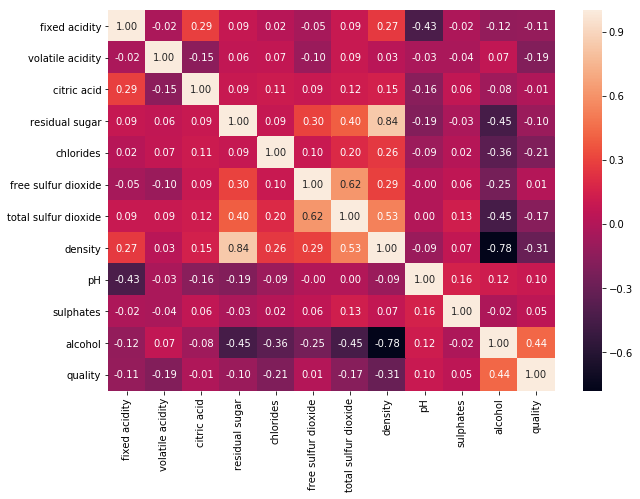

In [9]:
import seaborn as sns
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,fmt='.2f');

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score

In [11]:
data.quality = data.quality.astype('category')

In [12]:
x = data.drop('quality',axis=1)
y = data.quality

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [15]:
clf = LogisticRegression()
clf.fit(x_train,y_train)

f:\great_learnings\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
f:\great_learnings\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
y_pred = clf.predict(x_test)

In [17]:
cm = confusion_matrix(y_test,y_pred)

In [18]:
accuracy_score(y_test,y_pred)

0.5333333333333333

In [22]:
data.iloc[:,:1]

,fixed acidity
0,7.0
1,6.3
2,8.1
3,7.2
4,7.2
5,8.1
6,6.2
7,7.0
8,6.3
9,8.1


In [23]:
acc = []

In [64]:
for i in range(data.drop('quality',axis=1).shape[1]):
    x = data.drop('quality',axis=1).iloc[:,:i+1]
    y = data.quality
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
    clf1 = LogisticRegression()
    if x_train.shape[1] == 1:
        clf.fit(np.array(x_train).reshape(-1,1),y_train)
        y_pred = clf.predict(np.array(x_test).reshape(-1,1))
    else:
        clf1.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
    acc.append(accuracy_score(y_test,y_pred))

f:\great_learnings\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
f:\great_learnings\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
f:\great_learnings\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
f:\great_learnings\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


ValueError: X has 2 features per sample; expecting 1

In [65]:
acc

[0.45374149659863944, 0.45374149659863944, 0.45374149659863944]

In [29]:
len(data.quality.shape)

1

In [37]:
data.shape

(4898, 12)

In [58]:
data.drop('quality',axis=1).iloc[:,:4]

,fixed acidity,volatile acidity,citric acid,residual sugar
0,7.0,0.270,0.36,20.70
1,6.3,0.300,0.34,1.60
2,8.1,0.280,0.40,6.90
3,7.2,0.230,0.32,8.50
4,7.2,0.230,0.32,8.50
5,8.1,0.280,0.40,6.90
6,6.2,0.320,0.16,7.00
7,7.0,0.270,0.36,20.70
8,6.3,0.300,0.34,1.60
9,8.1,0.220,0.43,1.50


In [61]:
x_train.iloc[:,:]

,fixed acidity,volatile acidity
736,6.6,0.250
1620,7.8,0.260
336,6.3,0.230
2302,6.0,0.260
2673,7.9,0.370
2547,6.2,0.330
4318,6.3,0.410
1071,8.3,0.220
2210,7.4,0.240
3871,6.5,0.270
